In [160]:

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima
import pmdarima as pm

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse



from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings       
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')


# EDA

In [210]:
df = pd.read_excel("Superstore.xls")
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [211]:
df.shape

(9994, 21)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# indexing time series data

In [213]:
df = df.set_index(['Order Date'])
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# visualising the store sale

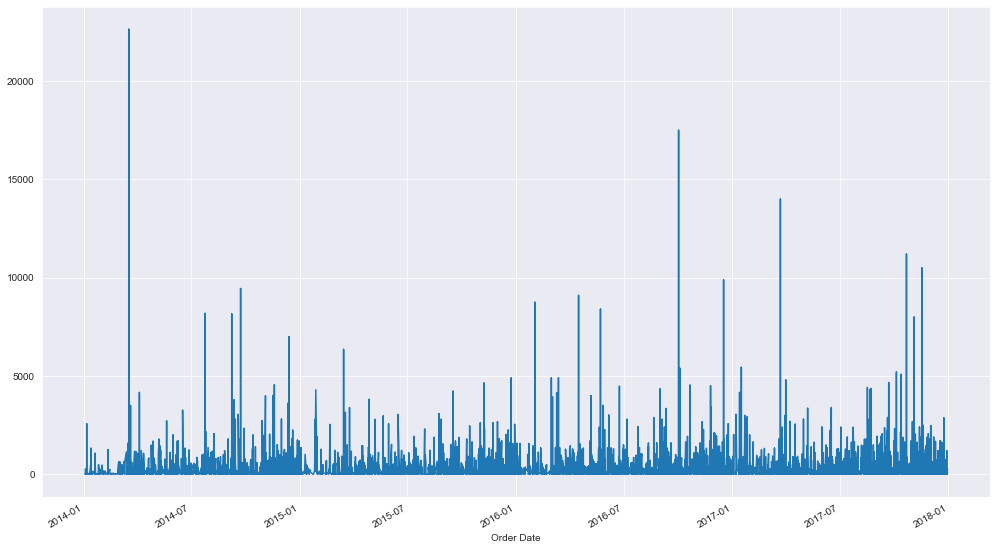

In [214]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
df['Sales'].plot();

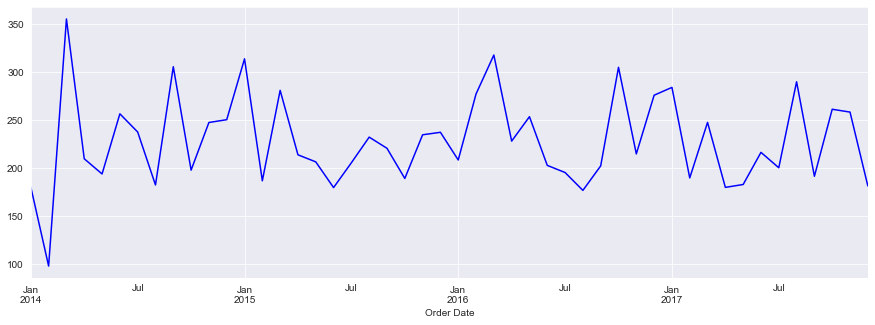

In [215]:
mean_monthlysales = df.resample(rule='MS').mean()['Sales']
#print(mean_monthlysales)
mean_monthlysales.plot(figsize=(15,5),c='blue')
plt.show()

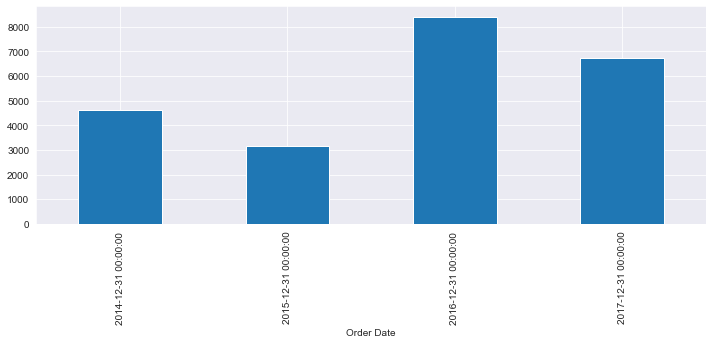

In [216]:
df.resample(rule='A').max()['Profit'].plot(kind='bar', figsize = (12,4))
plt.show()

# data Pre-Processing for ARIMA

In [217]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [218]:
df.isna().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [219]:
col = ['Row ID','Country','Customer Name','Product Name','Order ID','Customer ID','Sub-Category','Ship Date','Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Quantity','Discount','Profit']
df.drop(col,axis=1, inplace=True)

In [220]:
df.shape

(9994, 2)

In [221]:
df.head()

,Category,Sales
Order Date,,
2016-11-08,Furniture,261.9600
2016-11-08,Furniture,731.9400
2016-06-12,Office Supplies,14.6200
2015-10-11,Furniture,957.5775
2015-10-11,Office Supplies,22.3680


## furniture

In [222]:
furniture_data = df.loc[df['Category'] == 'Furniture']
furniture_data  = furniture_data.drop(['Category'],axis=1)
furniture_data.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [223]:
y_furniture = furniture_data['Sales'].resample('MS').mean()
y_furniture.head()

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
Freq: MS, Name: Sales, dtype: float64

In [224]:
furniture_data = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})

In [225]:
furniture_data.head()

,Order Date,Sales
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [226]:
furniture_df = furniture_data.sort_values('Order Date')
furniture_df = furniture_df.groupby('Order Date')['Sales'].sum().reset_index().set_index('Order Date') 
furniture_df.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792


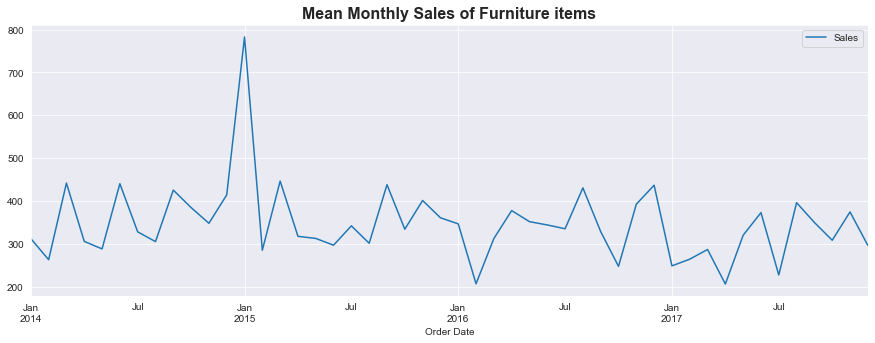

In [227]:
furniture_df.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Furniture items', fontsize=16, fontweight='bold')
plt.show()

## Office Supplies

In [228]:
office_supplies_data = df.loc[df['Category'] == 'Office Supplies']
office_supplies_data.drop('Category',axis=1, inplace=True)
office_supplies_data = office_supplies_data.sort_values('Order Date')
office_supplies_data = office_supplies_data.sort_values('Order Date')
office_supplies_data.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536


In [229]:
y_office = office_supplies_data['Sales'].resample('MS').mean()
y_office.head()

Order Date
2014-01-01     97.021600
2014-02-01     34.571742
2014-03-01     84.371363
2014-04-01    134.398482
2014-05-01    100.501746
Freq: MS, Name: Sales, dtype: float64

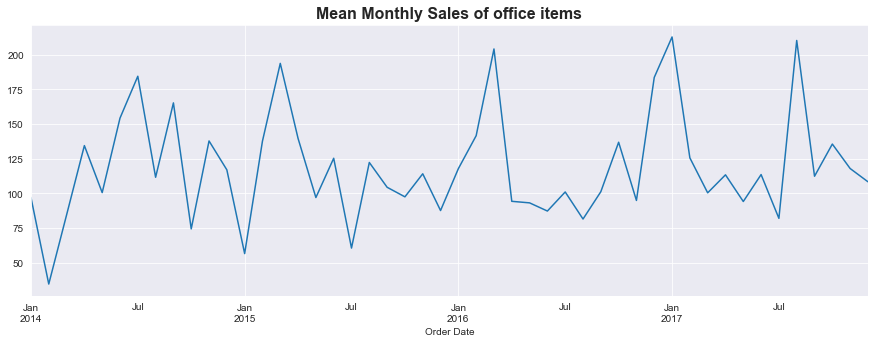

In [230]:
y_office.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of office items', fontsize=16, fontweight='bold')
plt.show()

## technology items 

In [231]:
technology_data = df.loc[df['Category'] == 'Technology']
technology_data.drop('Category',axis=1, inplace=True)
technology_data = technology_data.sort_values('Order Date')
technology_data.head()

,Sales
Order Date,
2014-01-06,755.96
2014-01-06,391.98
2014-01-09,31.20
2014-01-13,646.74
2014-01-15,149.95


In [232]:
y_technology = technology_data['Sales'].resample('MS').mean()
y_technology.head()

Order Date
2014-01-01     349.254444
2014-02-01     201.063750
2014-03-01    1477.780636
2014-04-01     353.670538
2014-05-01     355.550963
Freq: MS, Name: Sales, dtype: float64

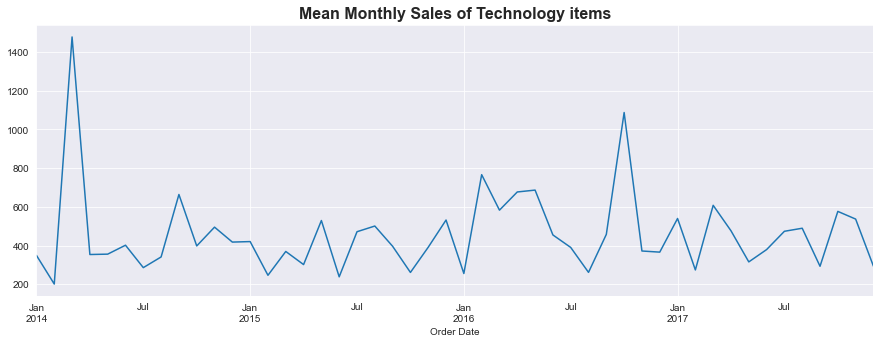

In [233]:
y_technology.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Technology items', fontsize=16, fontweight='bold')
plt.show()

## comparing the three categories

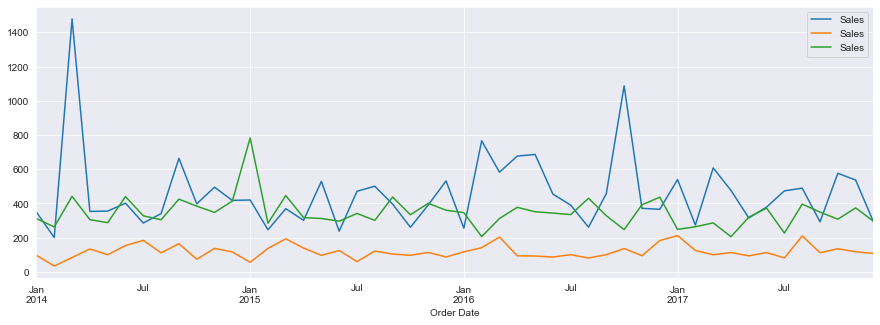

In [234]:
y_technology.plot(figsize = (15,5))
y_office.plot(figsize = (15,5))
y_furniture.plot(figsize = (15,5))
plt.legend()
plt.show()

# Seasonal visualisation off each category

In [235]:
from statsmodels.tsa.seasonal import seasonal_decompose

## furniture

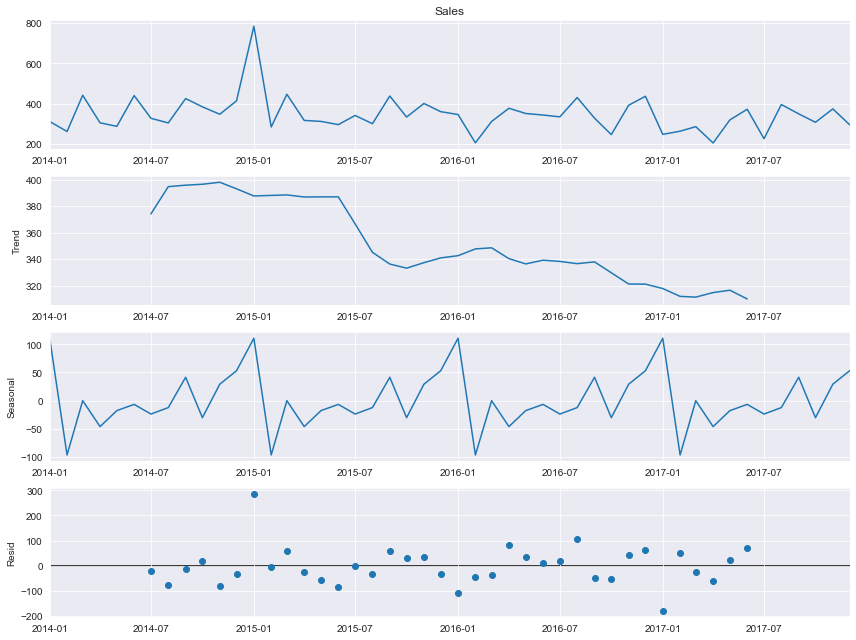

In [236]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_furniture, model='additive')
fig = decomposition.plot()
plt.show()

## office item

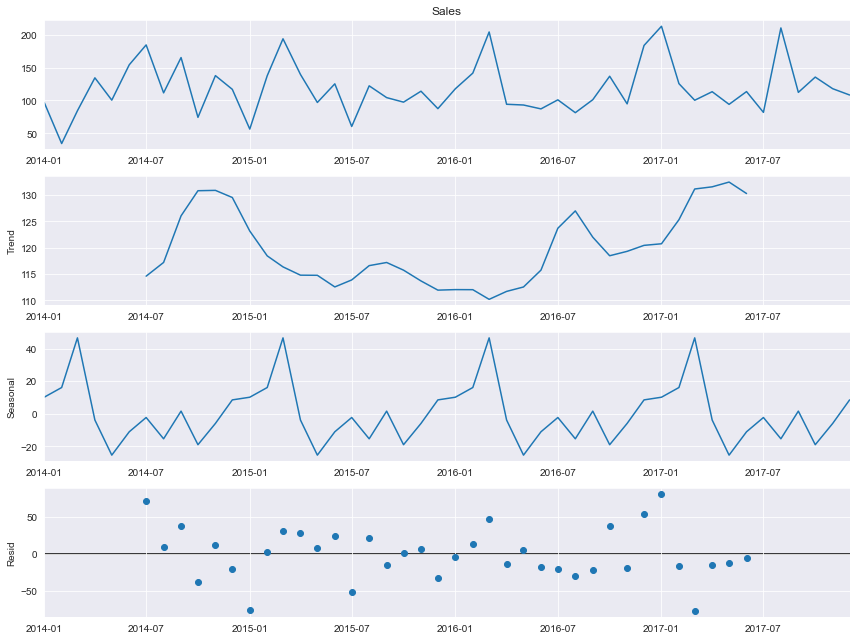

In [237]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_office, model='additive')
fig = decomposition.plot()
plt.show()

## Technology

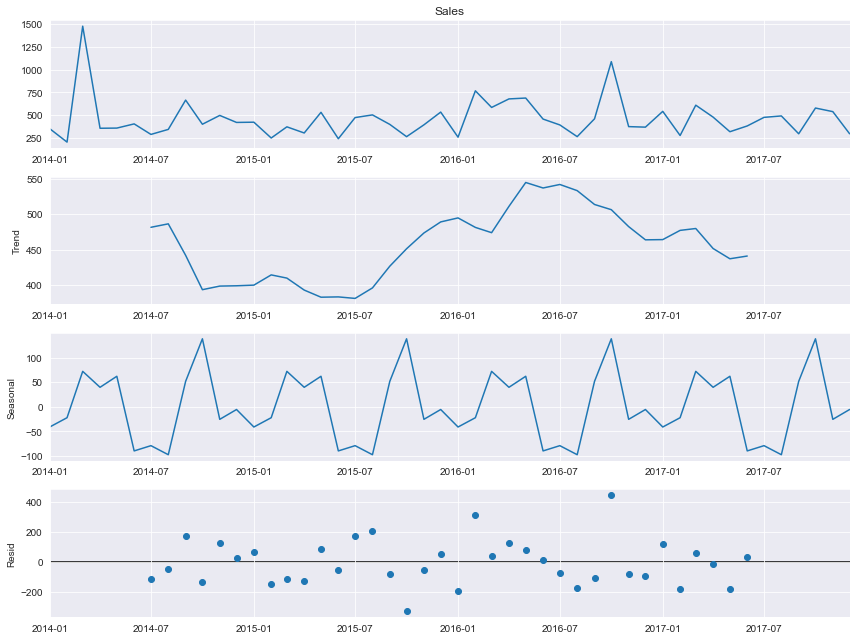

In [238]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_technology, model='additive')
fig = decomposition.plot()
plt.show()

# checking if data is stationary or not

In [239]:
from statsmodels.tsa.stattools import adfuller

In [240]:
def ADF(series):
    result = adfuller(series)
    # labels = ['ADF test statistic', 'p-value', 'Number of observations ', '#lags used']
    # for value, label in zip(result, labels):
    #     print(label+' : '+str(value))
    print("p-value = ",result[1])    
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [241]:
ADF(y_furniture)

p-value =  9.093398510006677e-10
Data is stationary


In [242]:
ADF(y_office)

p-value =  9.869101392257514e-08
Data is stationary


In [243]:
ADF(y_technology)

p-value =  4.94020681035206e-12
Data is stationary


The data is stationary as p-value<0.05

# Aproach 1 : ARIMA 

In [244]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.ARIMA(furniture_df['Sales'],order=(1,1,1))
result_arima_furniture=model.fit()

In [245]:
print(result_arima_furniture.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0690      0.203     -0.340      0.734      -0.466       0.328
ma.L1         -0.9201      0.123     -7.454      0.000      -1.162      -0.678
sigma2      8280.3359    904.775      9.152      0.000    6507.010    1.01e+04


<AxesSubplot:xlabel='Order Date'>

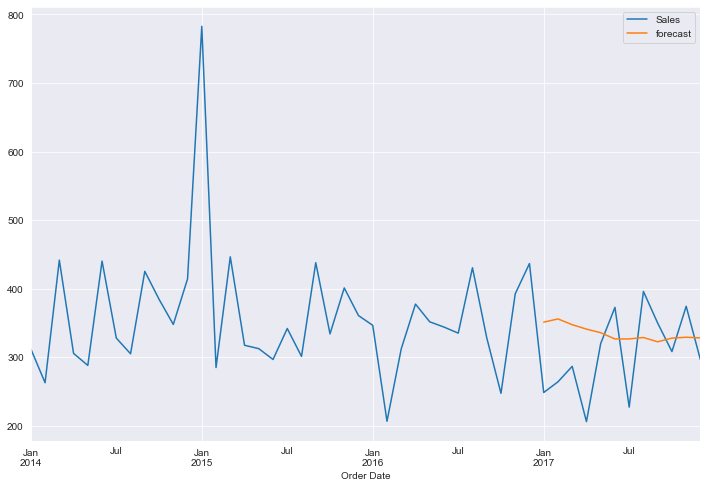

In [246]:
pred_df =furniture_df
pred_df['forecast'] = model_fit.predict(
    start=pd.to_datetime('2017-01-01'),
     dynamic=False)
pred_df[['Sales','forecast']].plot(figsize=(12,8))


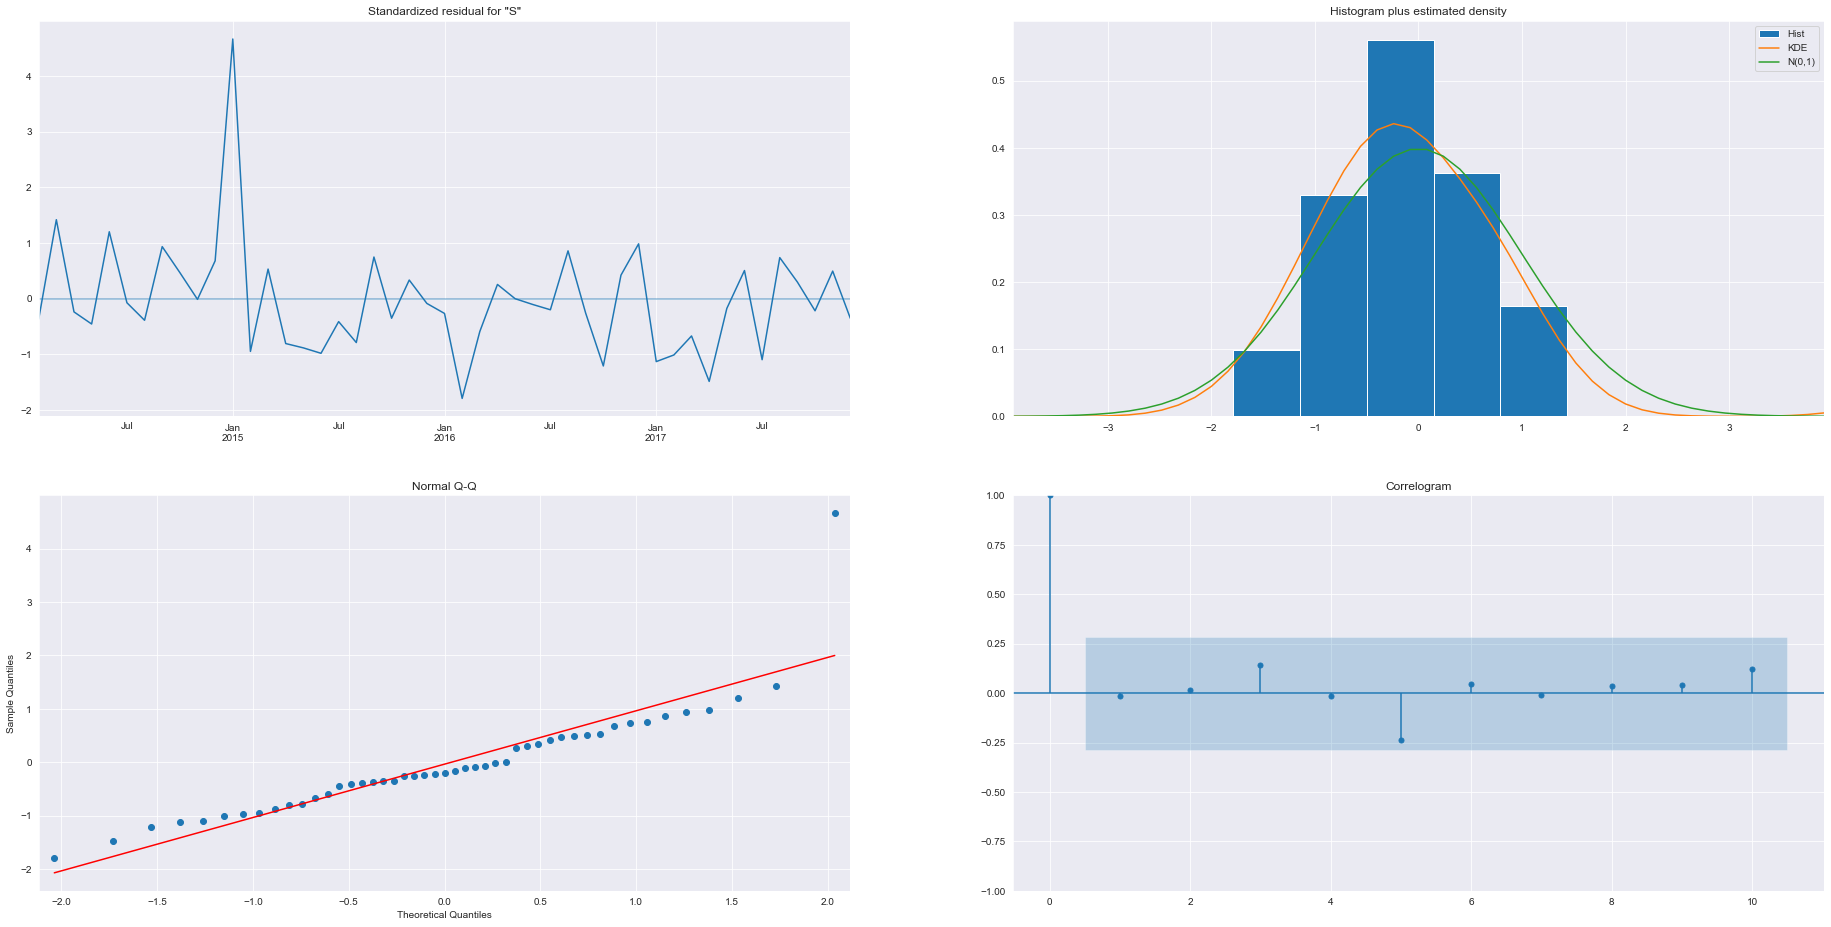

In [247]:
result_arima_furniture.plot_diagnostics(figsize=(32,16))
plt.show()

pred = results.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()